# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 


In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import cv2
import pandas as pd

In [2]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [3]:
from multiprocessing import Queue
import pickle

In [4]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**



### Basic Summary of the Data Set 

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

Sample images


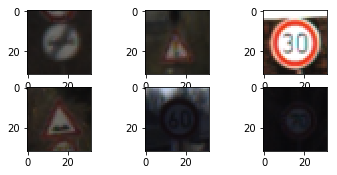

In [6]:
# 4 sample images plotted
print('Sample images')
for i in range (6):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i*1500+1])


#### A look to the distribution of images in the classes of the dataset

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
minimum samples for any label 180
maximum samples for any label 2010


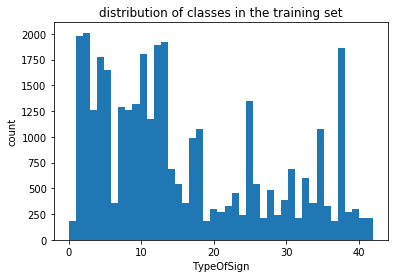

In [7]:
# distribution of classes in the test set
plt.hist(y_train, bins = n_classes)
plt.title('distribution of classes in the training set')
plt.xlabel('TypeOfSign')
plt.ylabel('count')
plt.plot()


print(np.bincount(y_train))
print("minimum samples for any label", min(np.bincount(y_train)))
print("maximum samples for any label", max(np.bincount(y_train)))

#### getting an idea of how these images look like

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


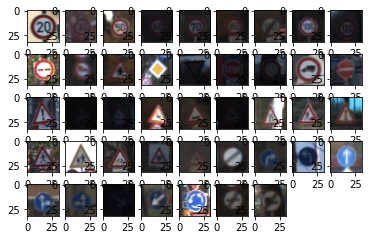

In [8]:
# Plotting one image of each TypeOfSign
sign_labels = set(y_train)
print(sign_labels)

for i in sign_labels:
    plt.subplot(5, 9, i+1)
    plt.imshow(X_train[y_train==i][1])
    plt.subplots_adjust(hspace = .001)
    

In [9]:
print(np.mean(X_train))
print(np.mean(X_test))

82.677589037
82.1484603612


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Various preprocessing techniques can be explored 


#### Shuffling will be required on the first place

In [11]:
# pre shuffling
print(y_train[0:500])

[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31

In [12]:
# shuffling the images
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [13]:
#post shuffling
print(y_train[0:500])

[ 1  7  6  9 12 38 16 33  5 41 12 10  4 25 26 38 11  1 14  6  2 25  0  2  9
  3 23 42 25 19  9 10  1 28  2 31  1 26 13 10 38 14  2 35 18 36  5  9 12  2
  8 30  5  4  2 13 13 10 10 42 35  5  8  8 13 13 16 10 10  5 13 35  5 18  6
  1  2  8 33  2 12 16  9 10 25  2 25  6  8 14 38 20 11  4  9 35  2 31  3 20
 38  8 38 17  6  7  4 11  5 24 10 20 42  2 18 33  5 13 18 14 29  3 12  1 12
 19  8 12  8 23  1 12 13  1 18 12  7 34 10  1 25  9  3  5  7 10 17  4 13 40
  3 18 17 17 12 18 20 17 34  0 24 10  7  2 11  4  3 10  9  8 36 35 35 37 37
 33  4 10  3 23  1  3 13  4  2 11 42 12 23 11  4  4 13 14 36 11 12 25 25 34
  3  2 15 35 40  4 31 22  7 12  2 10 10 25 13  2  3 25  3 35 12 20 10 21  9
  7  5 17 36  1  3 18 26 15 14 17 25  3 14 38 22 38 25 31 28 13 28 12  2 26
  5 12 38 23  7 25 35 16 38 13 26 13  9  4 25 20  5 15 25 26 18  3 13 10 17
 12  4 13  1  2  7 38 17 30  7  9 35 34 11  2  2 12 17 11  3 40 33 11  4 15
  7 10  4 13 18 34 10 36 31 34 36 34 13  4  4 11 35  3 10 12 40 25 21 38 11
  6 25 10 36

#### Conversion to grayscale

In [14]:
# Convert to grayscale
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)

print(np.mean(X_train_rgb))
print(np.mean(X_train_gry))


RGB shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)
82.677589037
82.677589037


#### Visualisation of the images in greyscale

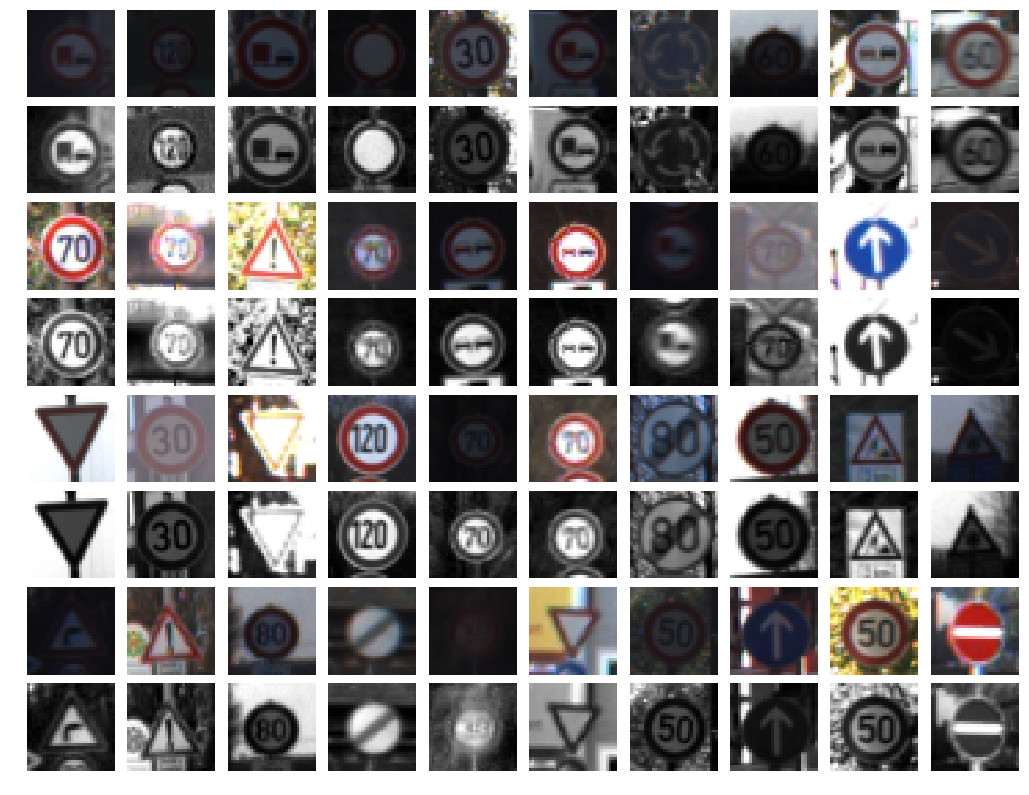

In [15]:
# Visualisation of rgb and grayscale images
# 
#

n_rows = 8
n_cols = 10
offset = 9000
fig, axs = plt.subplots(n_rows,n_cols, figsize=(18, 14))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
for j in range(0,n_rows,2):
    for i in range(n_cols):
        index = i + j*n_cols
        image = X_train_rgb[index + offset]
        axs[index].axis('off')
        axs[index].imshow(image)
    for i in range(n_cols):
        index = i + j*n_cols + n_cols 
        image = X_train_gry[index + offset - n_cols].squeeze()
        axs[index].axis('off')
        axs[index].imshow(image, cmap='gray')

In [16]:
X_train = X_train_gry
X_test = X_test_gry

print('Updated Xtrain and Xtest')

Updated Xtrain and Xtest


#### An exploraiton of various ways of preprocessing the features of the images (standardisaiton, normalisation)

In [17]:
# Normalisation and standardisation Analysis
# Really for me to grasp these concepts...


print('Original RGB Training Set pixel mean values', (np.mean(X_train_rgb)))
print('Original RGB Testing Set pixel mean values', (np.mean(X_test_rgb)))
print('Original GRAY Training Set pixel mean values', (np.mean(X_train_gry)))
print('Original GRAY Testing Set pixel mean values', (np.mean(X_test_gry)))


# Standardisation of input
std_X_train_rgb = (X_train_rgb - X_train_rgb.mean()) / np.std(X_train_rgb)
std_X_train = (X_test - X_test.mean()) / np.std(X_test)
std_X_test_rgb = (X_test_rgb - X_test_rgb.mean()) / np.std(X_test_rgb)
std_X_test = (X_test - X_test.mean()) / np.std(X_test)
print ('Standardised RGB train mean:', (np.mean(std_X_train_rgb)))
print ('Standardised RGB train max val:', (np.max(std_X_train_rgb)))
print ('Standardised RGB train min val:', (np.min(std_X_train_rgb)))
print ('Standardised GRAY train mean:', (np.mean(std_X_train)))
print ('Standardised GRAY train max val:', (np.max(std_X_train)))
print ('Standardised GRAY train min val:', (np.min(std_X_train)))
print ('Standardised RGB test mean:', (np.mean(std_X_test_rgb)))
print ('Standardised GRAY test mean:', (np.mean(std_X_test)))


#Normalisation of input
norm_X_train_rgb = (X_train_rgb - X_train_rgb.mean()) / (np.max(X_train_rgb) - np.min(X_train_rgb))
norm_X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
norm_X_test_rgb = (X_test_rgb - X_test_rgb.mean()) / (np.max(X_test_rgb) - np.min(X_test_rgb))
norm_X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))
print ('Normalised RGB train mean:', (np.mean(norm_X_train_rgb)))
print ('Normalised RGB train max val:', (np.max(norm_X_train_rgb)))
print ('Normalised RGB train min val:', (np.min(norm_X_train_rgb)))
print ('Normalised GRAY train mean:', (np.mean(norm_X_train)))
print ('Normalised GRAY train max val:', (np.max(norm_X_train)))
print ('Normalised GRAY train min val:', (np.min(norm_X_train)))
print ('Normalised RGB test mean:', (np.mean(norm_X_test_rgb)))
print ('Normalised GRAY test mean:', (np.mean(norm_X_test)))

# normalisation around the center value 128
# This will get the values between -1 and 1. The center value
# is not quite 0 but not far however. 
# 
norm128_X_train_rgb = (X_train_rgb - 128) / 128
norm128_X_train = (X_train - 128) / 128
norm128_X_test_rgb = (X_test_rgb - 128) / 128
norm128_X_test = (X_test - 128) / 128
print ('128Normalised RGB train mean:', (np.mean(norm128_X_train_rgb)))
print ('128Normalised RGB train max val:', (np.max(norm128_X_train_rgb)))
print ('128Normalised RGB train min val:', (np.min(norm128_X_train_rgb)))

print ('128Normalised GRAY train mean:', (np.mean(norm128_X_train)))
print ('128Normalised GRAY train max val:', (np.max(norm128_X_train)))
print ('128Normalised GRAY train min val:', (np.min(norm128_X_train)))

print ('128Normalised RGB test mean:', (np.mean(norm128_X_test_rgb)))
print ('128Normalised RGB test max val:', (np.max(norm128_X_test_rgb)))
print ('128Normalised RGB test min val:', (np.min(norm128_X_test_rgb)))

print ('128Normalised GRAY test mean:', (np.mean(norm128_X_test)))
print ('128Normalised GRAY test max val:', (np.max(norm128_X_test)))
print ('128Normalised GRAY test min val:', (np.min(norm128_X_test)))




Original RGB Training Set pixel mean values 82.677589037
Original RGB Testing Set pixel mean values 82.1484603612
Original GRAY Training Set pixel mean values 82.677589037
Original GRAY Testing Set pixel mean values 82.1484603612
Standardised RGB train mean: -2.38002924328e-17
Standardised RGB train max val: 2.53972224918
Standardised RGB train min val: -1.21851888685
Standardised GRAY train mean: 1.58103494227e-15
Standardised GRAY train max val: 2.58898371914
Standardised GRAY train min val: -1.17051367881
Standardised RGB test mean: 1.14731836242e-16
Standardised GRAY test mean: 1.58103494227e-15
Normalised RGB train mean: -3.93906537852e-18
Normalised RGB train max val: 0.675774160639
Normalised RGB train min val: -0.324225839361
Normalised GRAY train mean: 5.57788247614e-16
Normalised GRAY train max val: 0.685632934866
Normalised GRAY train min val: -0.314367065134
Normalised RGB test mean: 1.89959774839e-17
Normalised GRAY test mean: 4.37900793307e-16
128Normalised RGB train mean

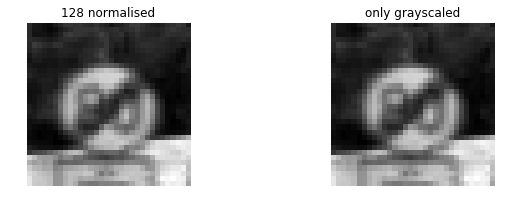

In [18]:

fig, axs = plt.subplots(1,2, figsize = (10, 3))
axs =axs.ravel()

axs[0].axis('off')
axs[0].set_title('128 normalised')
axs[0].imshow(norm128_X_train[2].squeeze(), cmap = 'gray')

axs[1].axis('off')
axs[1].set_title('only grayscaled')
axs[1].imshow(X_train[2].squeeze(), cmap = 'gray')



### Augmentation of the dataset by creating new transformed images
- Based Jeremy Shannon's Submission to Project 2
- Done really to understand a bit more of OpenCV and because this technique is interesting in my own work domain.
- I am using only 2 of the openCV transformations for brevity (translate and scale)

shape in/out: (32, 32, 1) (32, 32, 1)


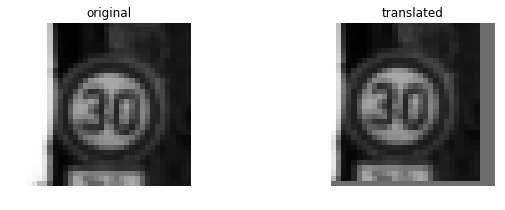

In [19]:
import cv2

def rand_translate(img):
    rows, cols, _ = img.shape
    
    # translation allowance up to px pixels x and y directions
    px = 4
    dx, dy = np.random.randint(-px, px, 2)
    
    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img, M, (cols, rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_img = norm128_X_train[0]
test_dst = rand_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')


axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated')

print('shape in/out:', test_img.shape, test_dst.shape)



shape in/out: (32, 32, 1) (32, 32, 1)


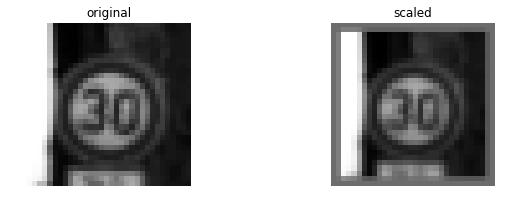

In [20]:

def rand_scaling(img):
    rows, cols,_ = img.shape
    
    # transformation limits
    px = np.random.randint(-4, 4)
    
    # ending locations
    pts1 = np.float32([[px, px], [rows - px, px], [px, cols - px], [rows - px, cols - px]])
    
    # starting locations at the corners 
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    
    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_img = norm128_X_train[0]
test_dst = rand_scaling(test_img)

ig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')


axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:', test_img.shape, test_dst.shape)
    
    

#### Quick check on the biggest and smallest set of images within the 43 classes

In [21]:
print(np.bincount(y_train))
print("minimum samples for any label", min(np.bincount(y_train)))
print("maximum samples for any label", max(np.bincount(y_train)))

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
minimum samples for any label 180
maximum samples for any label 2010


#### Augmentation of the dataset

In [22]:
# before
print('X, y shapes:', norm128_X_train.shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ':', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range (800 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(norm128_X_train.shape[0])
            new_img = norm128_X_train[class_indices[0][i%n_samples]]
            new_img = rand_translate(rand_scaling(new_img))
            norm128_X_train = np.concatenate((norm128_X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-', end='')
    print('')

    
# after
print('X, y shapes:', norm128_X_train.shape, y_train.shape)

X, y shapes: (34799, 32, 32, 1) (34799,)
0 :|----|----|----|----|----|----|----|----|----|----|----|----|-
1 :
2 :
3 :
4 :
5 :
6 :|----|----|----|----|----|----|----|----|---
7 :
8 :
9 :
10 :
11 :
12 :
13 :
14 :|----|----|
15 :|----|----|----|----|----|
16 :|----|----|----|----|----|----|----|----|---
17 :
18 :
19 :|----|----|----|----|----|----|----|----|----|----|----|----|-
20 :|----|----|----|----|----|----|----|----|----|----
21 :|----|----|----|----|----|----|----|----|----|----|--
22 :|----|----|----|----|----|----|----|----|----|-
23 :|----|----|----|----|----|----|----
24 :|----|----|----|----|----|----|----|----|----|----|----|
25 :
26 :|----|----|----|----|----|
27 :|----|----|----|----|----|----|----|----|----|----|----|---
28 :|----|----|----|----|----|----|-
29 :|----|----|----|----|----|----|----|----|----|----|----|
30 :|----|----|----|----|----|----|----|----|
31 :|----|----|
32 :|----|----|----|----|----|----|----|----|----|----|----|---
33 :|----|----|----|----|
34 :

#### Visualisation of the distribution of images accross classes after augmenting the daataset

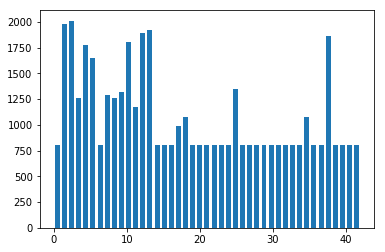

In [23]:
# another label frequency histogram
hist, bins = np.histogram(y_train, bins = n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1]+ bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

#### Another re-shufling of the data after augmentation

In [24]:
# Reshuffle the dataset
from sklearn.utils import shuffle

norm128_X_train, y_train = shuffle(norm128_X_train, y_train)

print('datasets reshuffled')

datasets reshuffled


In [25]:
print('X, y shapes:', norm128_X_train.shape, y_train.shape)

X, y shapes: (46480, 32, 32, 1) (46480,)


#### extracting 20% of the augmented dataset to use it as validation set

In [26]:


from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(norm128_X_train, y_train, 
                                                               test_size=0.20, random_state=42)

print("Old X_train size:",len(norm128_X_train))
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_valid))

Old X_train size: 46480
New X_train size: 37184
X_validation size: 9296


In [27]:
print('X, y shapes:', X_train.shape, y_train.shape)

X, y shapes: (37184, 32, 32, 1) (37184,)


## Model Architecture

#### Intialisation of TensorFlow and setup of epochs and batch sizes

In [29]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 70
BATCH_SIZE = 100

print('ready')

ready


### Sermanet Architecture
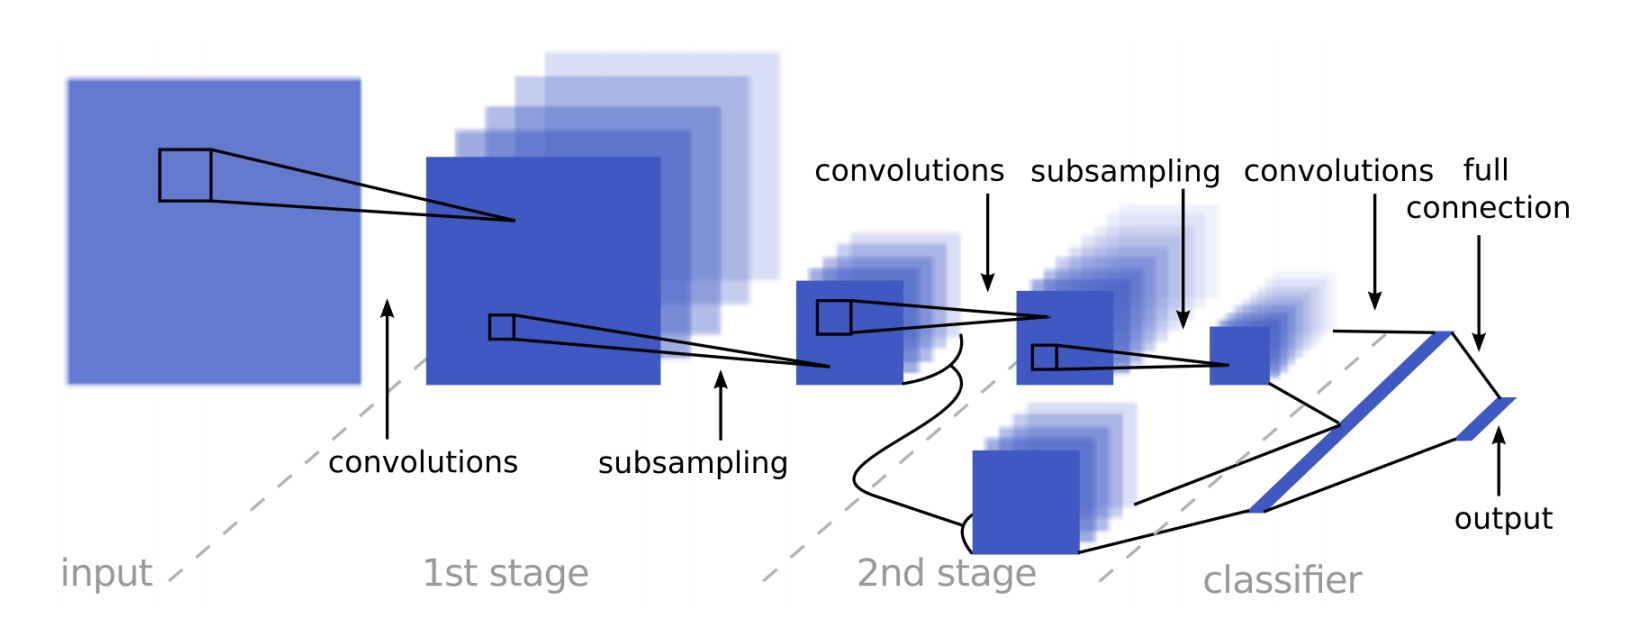


In [30]:
from tensorflow.contrib.layers import flatten

def Sermanet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1. Convolutional. Input = 32x32x1. Output = 28x28x6
    W1 = tf.Variable(tf.truncated_normal(shape = (5,5,1,6), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W1, strides=[1,1,1,1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x, b1)
    print('layer 1 shape:', x.get_shape())
    
    # Activation
    x = tf.nn.relu(x)
    
    # Pooling. In = 28x28x6, Out = 14x14x6
    x = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    layer1 = x
    
    # Layer 2. Convolutional. In = 14x14x6, Out = 10x10x16
    W2 = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1,1,1,1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
    
    # Activation
    x = tf.nn.relu(x)
    
    # Pooling. In = 10x10x16, Out = 5x5x16
    x = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    layer2 = x
    
    # Layer 3. Convolutional. In = 5x5x16, Out = 1x1x400
    W3 = tf.Variable(tf.truncated_normal(shape=(5,5,16,400), mean = mu, stddev= sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1,1,1,1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
    
    # Activation
    x = tf.nn.relu(x)
    layer3 = x
    
    # Flatten layer 2.  5x5x16, Out = 400
    layer2_flat = flatten(layer2)
    print("layer2_flat shape:", layer2_flat.get_shape())
    
    # Flatten x (layer3). In = 1x1x400, Out = 400
    xflat = flatten(x)
    print("xflat shape:", xflat.get_shape())
    
    # Concatenate layer2_flat and x. In = 400 + 400, Out = 800
    x = tf.concat([xflat, layer2_flat], 1)
    print("x shape:", x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # Layer4. Fully Connected. In = 800, Out = 43
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean= mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")
    logits = tf.add(tf.matmul(x, W4), b4)
    
    return logits
    
print('done')    

done


In [31]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32,32,1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # prob to keep units in dropout
one_hot_y = tf.one_hot(y, 43)

print('done')

done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [32]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.



In [33]:
rate = 0.001

logits = Sermanet(x)
print(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
print(cross_entropy)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer2_flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)
Tensor("Add:0", shape=(?, 43), dtype=float32)
Tensor("Reshape_2:0", shape=(?,), dtype=float32)


In [34]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y:batch_y, keep_prob:0.5})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('done')

done


In [35]:
specs = [[70.0, 30.0], [100.0,200.0]]
print(len(specs))

for i in range(len(specs)):
    a = specs[0]
    b = specs[1]
    print(b)
   

2
[100.0, 200.0]
[100.0, 200.0]


In [36]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Training now...')
    print ()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train) 
        for offset in range (0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {}...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, 'sermanet')
    print('Model saved')
    

Training now...

EPOCH 1...
Validation Accuracy = 0.722

EPOCH 2...
Validation Accuracy = 0.834

EPOCH 3...
Validation Accuracy = 0.881

EPOCH 4...
Validation Accuracy = 0.895

EPOCH 5...
Validation Accuracy = 0.914

EPOCH 6...
Validation Accuracy = 0.925

EPOCH 7...
Validation Accuracy = 0.932

EPOCH 8...
Validation Accuracy = 0.935

EPOCH 9...
Validation Accuracy = 0.940

EPOCH 10...
Validation Accuracy = 0.944

EPOCH 11...
Validation Accuracy = 0.948

EPOCH 12...
Validation Accuracy = 0.951

EPOCH 13...
Validation Accuracy = 0.952

EPOCH 14...
Validation Accuracy = 0.952

EPOCH 15...
Validation Accuracy = 0.952

EPOCH 16...
Validation Accuracy = 0.958

EPOCH 17...
Validation Accuracy = 0.956

EPOCH 18...
Validation Accuracy = 0.949

EPOCH 19...
Validation Accuracy = 0.958

EPOCH 20...
Validation Accuracy = 0.960

EPOCH 21...
Validation Accuracy = 0.958

EPOCH 22...
Validation Accuracy = 0.956

EPOCH 23...
Validation Accuracy = 0.961

EPOCH 24...
Validation Accuracy = 0.964

EPOCH 25

In [37]:
# Finally Evaluate the accuracy with the test dataset

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./sermanet.meta')
    saver2.restore(sess, "./sermanet")
    test_accuracy = evaluate(norm128_X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./sermanet
Test Set Accuracy = 0.918


# IMPORTANT: the output of the previous cell displays the accuracy achieved in the training



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [38]:
# Reinitialise the system 
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2

### Load and Output the Images

(5, 32, 32, 1)


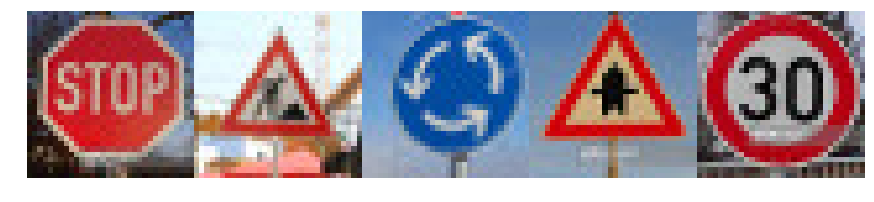

In [39]:
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(1,5, figsize=(15, 15))
fig.subplots_adjust(hspace = .5, wspace = .001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('./GerImages/*.jpg')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

my_images = np.asarray(my_images)
my_images_grey = np.sum(my_images/3, axis=3, keepdims=True)
my_images_normalised = (my_images_grey - 128)/128


print(my_images_normalised.shape)


### Predict the Sign Type for Each Image

In [51]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

my_image_labels = [14, 25, 40, 11, 1]

# only speed images
# my_image_labels = [28, 1]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./sermanet.meta')
    saver3.restore(sess, "./sermanet")
    my_accuracy = evaluate(my_images_normalised, my_image_labels)
    print("Test Set Accuracy = {:.3f}" .format(my_accuracy))


INFO:tensorflow:Restoring parameters from ./sermanet
Test Set Accuracy = 1.000


### Analyze Performance

INFO:tensorflow:Restoring parameters from ./sermanet


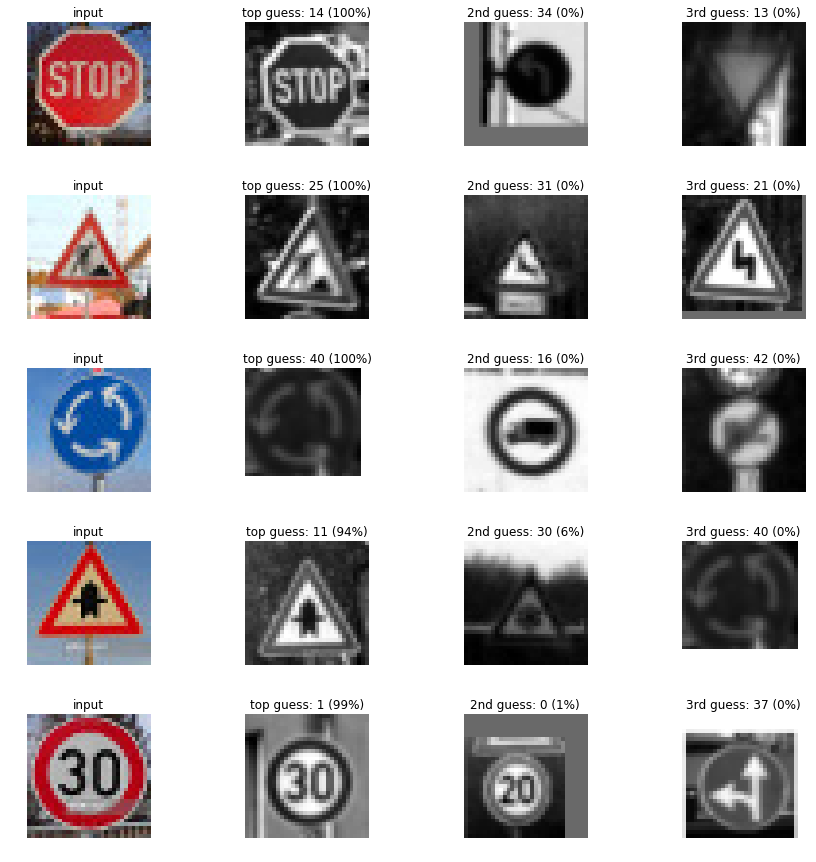

In [54]:
### Print out the top five softmax probabilities for the predictions on the German traffic 
# sign images found on the web. 
### Feel free to use as many code cells as needed.


softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./sermanet.meta')
    saver.restore(sess, './sermanet')
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalised, keep_prob:1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalised, keep_prob:1.0})
    
    fig, axs = plt.subplots(len(my_images), 4, figsize=(15, 15))
    fig.subplots_adjust(hspace= .4, wspace= .2)
    axs = axs.ravel()
    
    
    for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
        
    

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

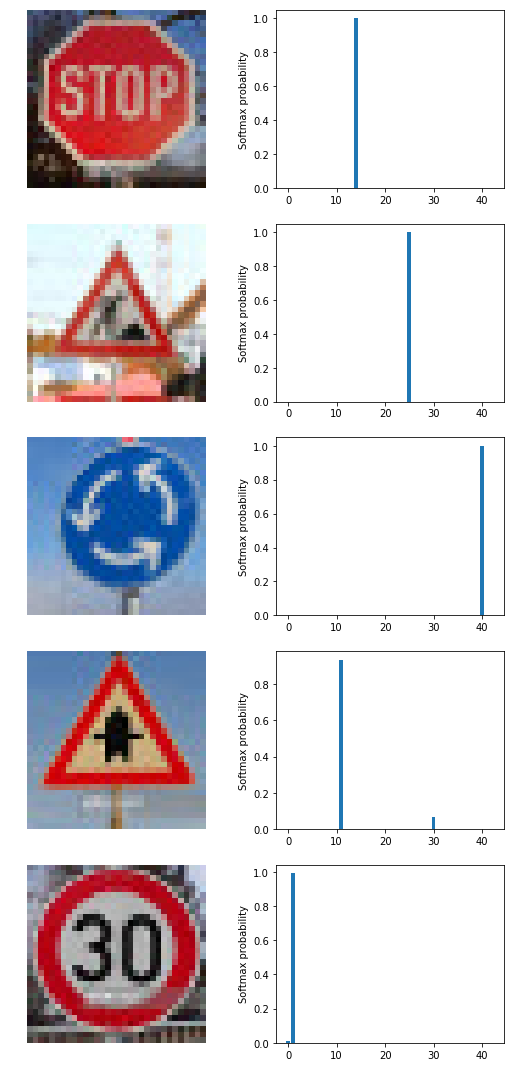

In [55]:
fig, axs = plt.subplots(5,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(my_images[i//2], cv2.COLOR_BGR2RGB))
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")